# GRIP: The Sparks Foundation
## Data Science and Business Analytics Intern
### Author: Ajinkya Sonawane
### Task 1: Prediction using Supervised ML (Level: Beginner)
#### Dataset: 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [138]:
df_score=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [139]:
df_score.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [140]:
df_score.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [141]:
df_score.shape

(25, 2)

In [142]:
df_score.size

50

In [143]:
df_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [144]:
df_score.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


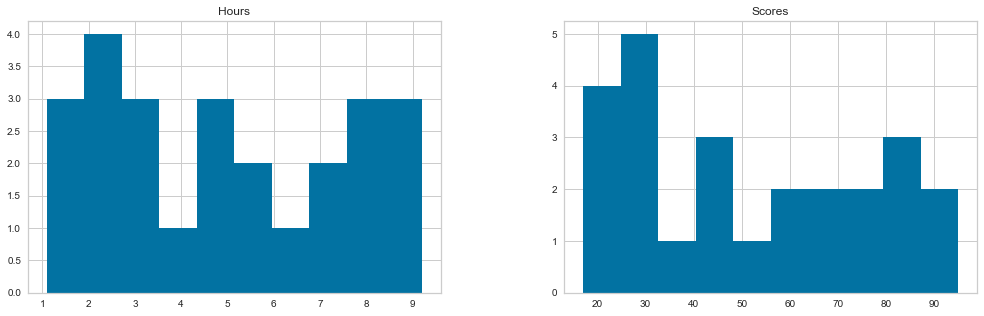

In [204]:
# Plotting the distribution of hours and scores
df_score.hist(bins=10 ,figsize=(17,5));

In [146]:
df_score.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


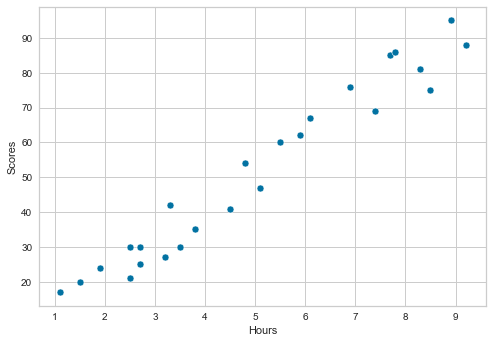

In [205]:
# Plotting the distribution of hours vs scores
sns.scatterplot(df_score['Hours'],df_score['Scores']);

### Preparation of the Data

In [148]:
x=df_score['Hours'].values.reshape(-1,1)
x.shape

(25, 1)

In [149]:
y=df_score['Scores'].values

In [150]:
#X = df_score.iloc[:, :-1].values  
#y = df_score.iloc[:, 1].values

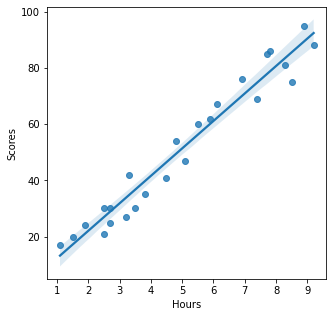

In [151]:
plt.figure(figsize=(5,5))
sns.regplot(x, y);
plt.xlabel('Hours')
plt.ylabel('Scores');

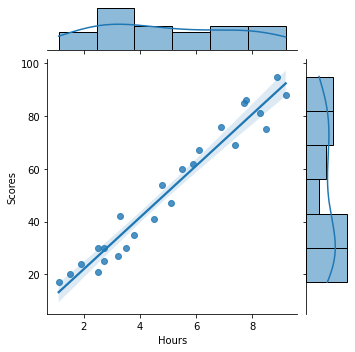

In [152]:
sns.jointplot(x='Hours', y='Scores', data=df_score, kind='reg', size=5);

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

### Training the Algorithm

In [155]:
from sklearn.linear_model import LinearRegression

In [156]:
model=LinearRegression()

In [157]:
model.fit(x_train,y_train)

LinearRegression()

### Making Predictions

In [158]:
print(x_test)
y_test_pred=model.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [159]:
model.coef_

array([9.91065648])

In [160]:
model.intercept_

2.018160041434683

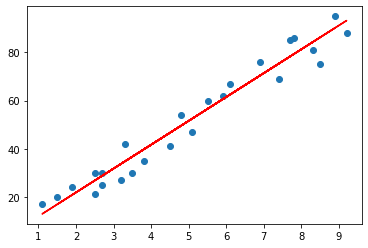

In [161]:
line=model.coef_*x+model.intercept_
plt.scatter(x,y)
plt.plot(x,line,color='red');

In [162]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [165]:
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.9515510725211552
0.9454906892105356


In [170]:
! pip install yellowbrick

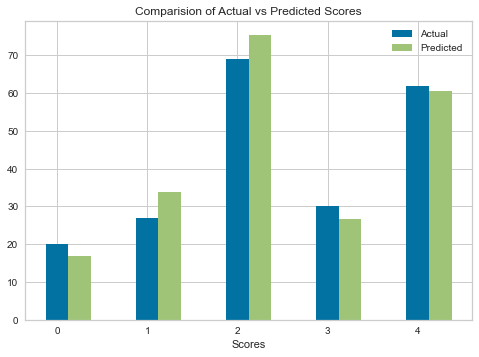

In [207]:
i=np.arange(len(df))
j=[x+0.25 for x in i]
plt.bar(i,df['Actual'],width=0.25,label='Actual')
plt.bar(j,df['Predicted'],width=0.25,label='Predicted')
plt.legend()
plt.xlabel('Scores')
plt.title('Comparision of Actual vs Predicted Scores');

In [201]:
hours = 9.25
test=np.array([hours])
own_pred = model.predict(test.reshape(-1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


### Evaluating the Model

In [203]:
from sklearn import metrics
print('Mean absolute error:',metrics.mean_absolute_error(y_test,y_test_pred))
print('Mean squared error:',metrics.mean_squared_error(y_test,y_test_pred))
print('Root mean squared error:',np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))
print('R-2:',metrics.r2_score(y_test,y_test_pred))

Mean absolute error: 4.183859899002975
Mean squared error: 21.5987693072174
Root mean squared error: 4.6474476121003665
R-2: 0.9454906892105356


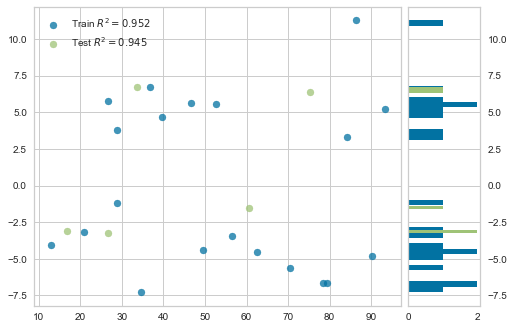

In [202]:
from yellowbrick.regressor import ResidualsPlot
plot_visuals =ResidualsPlot(model)
plot_visuals.fit(x_train,y_train)
plot_visuals.score(x_test,y_test)
plt.legend(loc='upper left');

# Thank You.